# Análisis de los procesos migratorios 2000 - 2019

### PROYECTO TECNOLÓGICO INTEGRADOR ISPC

Integrantes:

* Joaquín Torres
* Leonardo Mansilla
* Daiana Senese

#### Fuente: https://datosmacro.expansion.com/demografia/migracion/inmigracion?anio=2019

##### La inmigración se define como el cambio de residencia habitual de una persona de un territorio (país) a otro por un periodo que se espera sea al menos de 12 meses. Así pues, cuando hablamos de inmigración e inmigrantes, nos referimos a las personas que entran en un país y nacieron o proceden de otro.

In [88]:
# se importan las librerias necesarias 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

mpl.style.use('bmh')

In [89]:
df_complete = pd.read_csv(r'/scraping_proyecto_integrador/TSSSM5/csv_2000_to_2019.csv')

## Se realizan distintas operaciones para visualizar la composición del dataframe

In [90]:
df_complete.shape

(1168, 8)

In [91]:
df_complete.head(5)

,Unnamed: 0,Países,Inmigrantes hombres,Inmigrantes mujeres,Inmigrantes,% Inmigrantes,Var.,year
0,0,España,838.058,819.227,1.657.285,"4,08%","1,52",2000
1,1,Alemania,4.503.666,4.488.965,8.992.631,"10,93%","1,81",2000
2,2,Reino Unido,2.228.628,2.501.537,4.730.165,"8,02%","0,87",2000
3,3,Francia,3.092.789,3.185.929,6.278.718,"10,30%","0,07",2000
4,4,Italia,976.691,1.144.997,2.121.688,"3,72%","0,60",2000


In [193]:
df_complete.columns

Index(['Unnamed: 0', 'Países', 'Inmigrantes hombres', 'Inmigrantes mujeres',
       'Inmigrantes', '% Inmigrantes', 'Var.', 'year'],
      dtype='object')

In [194]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1168 non-null   int64 
 1   Países               1168 non-null   object
 2   Inmigrantes hombres  1168 non-null   object
 3   Inmigrantes mujeres  1168 non-null   object
 4   Inmigrantes          1168 non-null   object
 5   % Inmigrantes        1168 non-null   object
 6   Var.                 1167 non-null   object
 7   year                 1168 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 73.1+ KB


### Se realizan procedimientos para modificar el tipo de datos que contiene el data frame.

In [92]:
Inmigrants_total = []
for h in range(len(df_complete["Inmigrantes"])):
    Inmigrants_total.append(int(df_complete["Inmigrantes"][h].replace('.', '')))


Inmigrants_m_total = []
for h in range(len(df_complete["Inmigrantes mujeres"])):
    Inmigrants_m_total.append(int(df_complete["Inmigrantes mujeres"][h].replace('.', '')))

Inmigrants_h_total = []
for h in range(len(df_complete["Inmigrantes hombres"])):
    Inmigrants_h_total.append(int(df_complete["Inmigrantes hombres"][h].replace('.', '')))

Inmigrants_porc_total = []
for h in range(len(df_complete['% Inmigrantes'])):
    Inmigrants_porc_total.append(float(df_complete['% Inmigrantes'][h].replace('%', '').replace(',', '.')))

Inmigrants_year_total = []
for h in range(len(df_complete["year"])):
    Inmigrants_year_total.append(str(df_complete["year"][h]))

df_complete["Inmigrantes_total"] = Inmigrants_total
df_complete["Inmigrantes_hombres"] = Inmigrants_m_total
df_complete["Inmigrantes_mujeres"] = Inmigrants_h_total
df_complete["Proporcion_total"] = Inmigrants_porc_total
df_complete["Year"] = Inmigrants_year_total

df_complete = df_complete.drop(['% Inmigrantes','Inmigrantes hombres','Inmigrantes mujeres', 'Inmigrantes', 'year'], axis=1)


In [93]:
## Mostramos la estructura de la tabla final
df_complete.head(10)

,Unnamed: 0,Países,Var.,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres,Proporcion_total,Year
0,0,España,"1,52",1657285,819227,838058,4.08,2000
1,1,Alemania,"1,81",8992631,4488965,4503666,10.93,2000
2,2,Reino Unido,"0,87",4730165,2501537,2228628,8.02,2000
3,3,Francia,"0,07",6278718,3185929,3092789,10.30,2000
4,4,Italia,"0,60",2121688,1144997,976691,3.72,2000
5,5,Portugal,"1,00",651472,331153,320319,6.31,2000
6,6,Estados Unidos,"1,66",34814053,17503268,17310785,12.34,2000
7,7,Japón,"0,24",1686444,889516,796928,1.33,2000
8,8,China,0,508034,253952,254082,0.04,2000
9,9,Andorra,"-5,21",42147,20054,22093,64.01,2000


## Serie de tiempo: total de inmigrantes por año. 

In [95]:
cant_year = df_complete.groupby(["Year"]).sum('Inmigrantes_total')

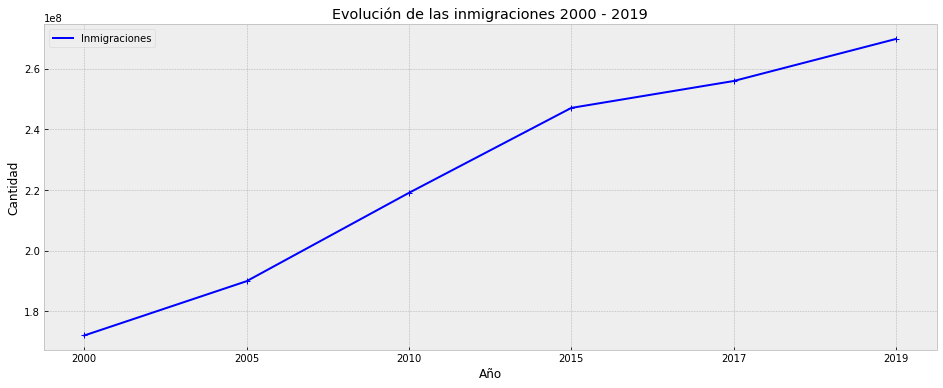

In [96]:
year_index = cant_year.index

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(year_index, cant_year["Inmigrantes_total"], 'b',  label='Inmigraciones')
ax.plot(year_index, cant_year["Inmigrantes_total"],  'b+')
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de las inmigraciones 2000 - 2019')
ax.legend() 

## Nos enfocamos en los años 2000 y 2019

In [100]:
## Se crea un dataframe con los registros pertenecientes al año 2000
df_2000 = df_complete[df_complete['Year'] == '2000']

## Se crea un dataframe con los registros pertenecientes al año 2019
df_2019 = df_complete[df_complete['Year'] == '2019']


#### El dataframe del año 2000 cuenta con las siguiente cantidad de filas y columnas:

In [101]:
df_2000.shape

(194, 8)

#### El dataframe del año 2019 cuenta con las siguiente cantidad de filas y columnas:

In [102]:
df_2019.shape

(195, 8)

### Se generan los siguientes gráficos que muestran los 10 paises con mayor inmigración para los años 2000 y 2019

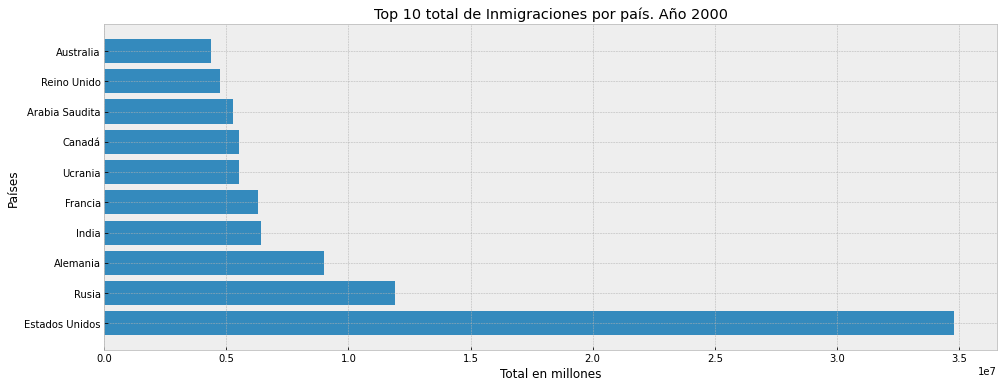

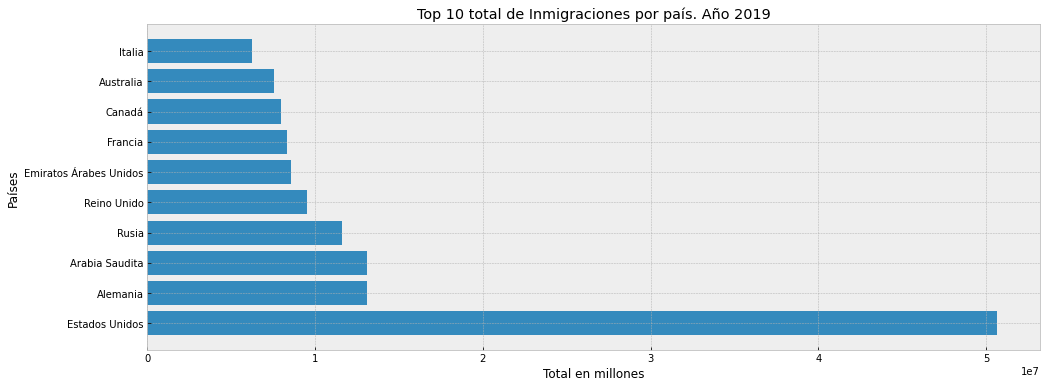

In [103]:
df_2000 = df_2000.sort_values(by=['Inmigrantes_total'], ascending=False)
top_10_df_2000 = df_2000.head(10)

df_2019 = df_2019.sort_values(by=['Inmigrantes_total'], ascending=False)
top_10_df_2019 = df_2019.head(10)



fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_df_2000['Países'], top_10_df_2000['Inmigrantes_total'])
ax.set_title('Top 10 total de Inmigraciones por país. Año 2000')
ax.set_ylabel('Países')
ax.set_xlabel('Total en millones')

fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_df_2019['Países'], top_10_df_2019['Inmigrantes_total'])
ax.set_title('Top 10 total de Inmigraciones por país. Año 2019')
ax.set_ylabel('Países')
ax.set_xlabel('Total en millones')

plt.show()

## A su vez, se muestran en los siguientes gráficos el TOP 10 paises con mayor proporcion de inmigrantes sobre su población total. 

Text(0.5, 0, 'Proporción total')

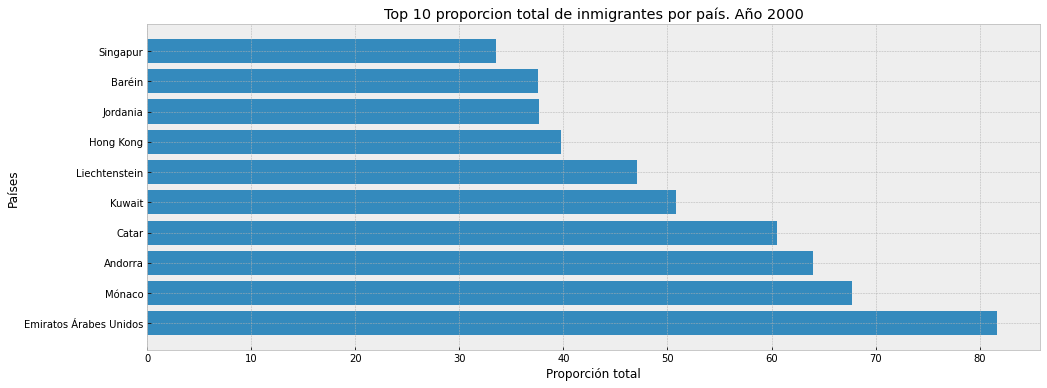

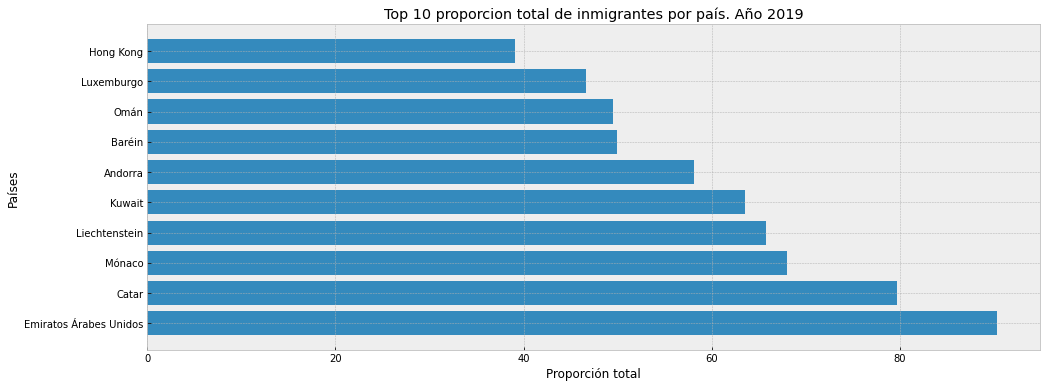

In [104]:
df_2000_sort =df_2000.sort_values(by=['Proporcion_total'], ascending=False)
top_10_prop_inm_2000 = df_2000_sort.head(10)

df_2019_sort =df_2019.sort_values(by=['Proporcion_total'], ascending=False)
top_10_prop_inm_2019 = df_2019_sort.head(10)


fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_prop_inm_2000['Países'], top_10_prop_inm_2000['Proporcion_total'])
ax.set_title('Top 10 proporcion total de inmigrantes por país. Año 2000')
ax.set_ylabel('Países')
ax.set_xlabel('Proporción total')

fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_prop_inm_2019['Países'], top_10_prop_inm_2019['Proporcion_total'])
ax.set_title('Top 10 proporcion total de inmigrantes por país. Año 2019')
ax.set_ylabel('Países')
ax.set_xlabel('Proporción total')


## En cuanto a la frecuencia de proporción inmigrantes sobre su población total para los años 2000 y 2019 se puede visualizar en los siguientes histogramas. 

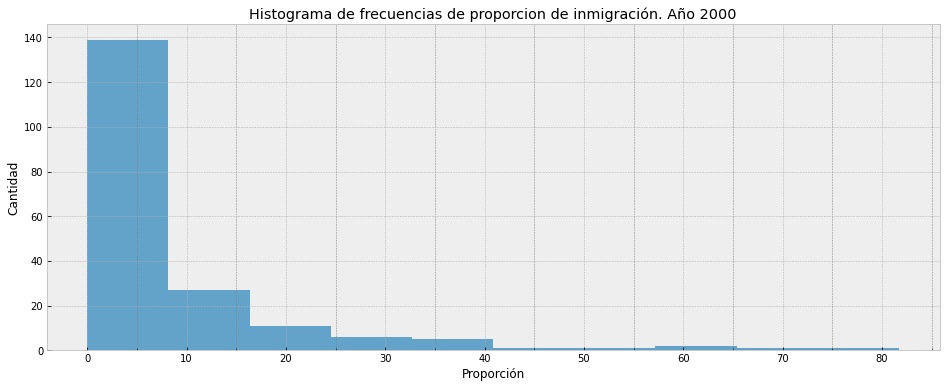

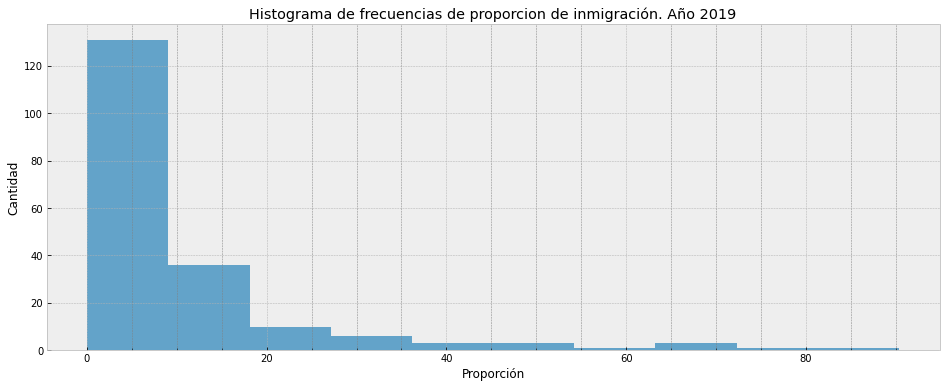

In [105]:

fig, ax = plt.subplots(figsize=(16,6))
ax.hist(df_2000['Proporcion_total'], 10, alpha=0.75)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.grid(which='minor', linestyle='dashed', color='gray')
ax.set_xlabel('Proporción')                  
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de frecuencias de proporcion de inmigración. Año 2000')


fig, ax = plt.subplots(figsize=(16,6))
ax.hist(df_2019['Proporcion_total'],10, alpha=0.75)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.grid(which='minor', linestyle='dashed', color='gray')
ax.set_xlabel('Proporción')                  
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de frecuencias de proporcion de inmigración. Año 2019')
plt.show()

## Nos enfocamos en la situación de Argentina

In [106]:
arg_inmig = df_complete[df_complete['Países'] == 'Argentina']
arg_inmig.head(6)

,Unnamed: 0,Países,Var.,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres,Proporcion_total,Year
16,16,Argentina,"-0,40",1540219,822295,717924,4.19,2000
210,16,Argentina,"0,15",1673088,898278,774810,4.34,2005
404,16,Argentina,"0,09",1805957,974261,831696,4.43,2010
599,16,Argentina,"0,41",2086302,1125992,960310,4.84,2015
794,16,Argentina,"0,07",2164524,1168208,996316,4.91,2017
989,16,Argentina,"0,01",2212879,1194306,1018573,4.92,2019


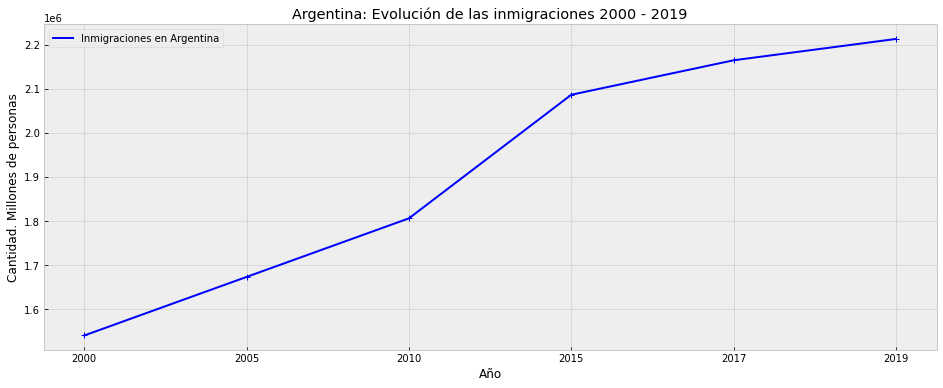

In [108]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(arg_inmig["Year"], arg_inmig["Inmigrantes_total"], 'b',  label='Inmigraciones en Argentina')
ax.plot(arg_inmig["Year"], arg_inmig["Inmigrantes_total"],  'b+')
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad. Millones de personas')
ax.set_title('Argentina: Evolución de las inmigraciones 2000 - 2019')
ax.legend() 

### A su vez en estos años, visualizamos la cantidad de inmigrantes hombres y mujeres.

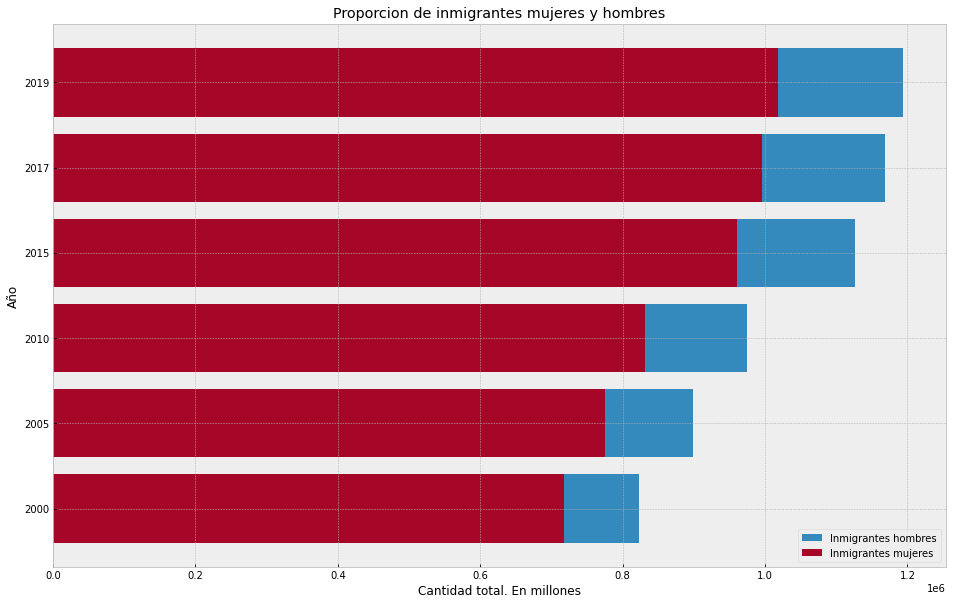

In [122]:
fig, ax = plt.subplots(figsize=(16,10))
ax.barh(arg_inmig["Year"], arg_inmig["Inmigrantes_hombres"], label = 'Inmigrantes hombres')
ax.barh(arg_inmig["Year"], arg_inmig["Inmigrantes_mujeres"], label = 'Inmigrantes mujeres')

ax.set_title('Proporcion de inmigrantes mujeres y hombres')
ax.set_ylabel('Año')
ax.set_xlabel('Cantidad total. En millones')
plt.legend()
plt.show()